# Supporting Jupyter Notebook for "Segmented K-Space Blipped-Controlled Aliasing in Parallel Imaging (Skipped-CAIPI) for High Spatiotemporal Resolution Echo Planar Imaging"

Provisionally accepted by Magnetic Resonance in Medicine, 2020

Rüdiger Stirnberg (1), Tony Stöcker (1,2)

1. German Center for Neurodegenerative Diseases (DZNE), Bonn, Germany
2. Department of Physics and Astronomy, University of Bonn, Bonn, Germany

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import matplotlib.gridspec as gridspec
from skippedcaipi import * # get_zblips, get_zblipcycle and plotting functions

# Font size
FS = 11
rcParams.update({'font.size': FS})

# Elementary sampling cell repetitions along y
# Increase, if you want/have to see more of the trajectory (e.g. for large S)
# A minimum of 3 is recommended.
SR = 3


# Enter CAIPI pattern parameters and segmentation factor

# $S\cdot {R_y\times R_z}_{\Delta z}$

In [2]:
Ry=1 # Undersampling factor along y (primary phase encode direction, w.l.o.g.)
Rz=8 # Undersampling factor along z (slice direction, w.l.o.g.)
Dz=2 # CAIPI shift along z
S=2  # Segmentation factor

# $Z$-blips and $z$-blip cycle of associated blipped-CAIPI trajectory 

### Eq. A1 and A2 with $S=1$:

$b_{1}^{(1)} = \Delta z \text{ mod } R_z\\
b_{1}^{(2)} = (R_z - b_{1}^{(1)}) \text{ mod } R_z\\
b_{1,min} =\min(b_{1}^{(1)}, b_{1}^{(2)})$

$
n_1 = \begin{cases}
1 &, \text{if } b_{1,min}=b_{1}^{(1)}=b_{1}^{(2)}=0\\
R_z/b_{1,min}&, \text{if } R_z \text{ mod } b_{1,min} = 0\\
R_z&, \text{else}
\end{cases}
$

The blipped-CAIPI z-blip (amplitudes) are 2 and 6.
The z-blip sequence repeats every 4 echoes (cycle n1):


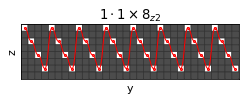

In [3]:
b1 = get_zblips(Ry, Rz, Dz, S=1)
print("The blipped-CAIPI z-blip (amplitudes) are %d and %d." % (b1))
n1 = get_zblipcycle(Rz, bmin=np.min(b1))
print("The z-blip sequence repeats every %d echoes (cycle n1):" % (n1))

plt.figure(figsize = (5*SR,1))
_, notation = plot_skipped_caipi(Ry, Rz, Dz, 1, color=[1.0,0,0], repetitions=SR)
plt.title(notation)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

# $Z$-blips and $z$-blip cycle of skipped-CAIPI trajectory 

### Eq. A1 and A2 with specified $S$:

$b_{S}^{(1)} = (S\cdot \Delta z) \text{ mod } R_z\\
b_{S}^{(2)} = (R_z - b_{S}^{(1)}) \text{ mod } R_z\\
b_{S,min} =\min(b_{S}^{(1)}, b_{S}^{(2)})$

$
n_S = \begin{cases}
1 &, \text{if } b_{S,min}=b_{S}^{(1)}=b_{S}^{(2)}=0\\
R_z/b_{S,min}&, \text{if } R_z \text{ mod } b_{S,min} = 0\\
R_z&, \text{else}
\end{cases}
$

The z-blip (amplitudes) with S=2 are 4 and 4.
The z-blip sequence repeats every 2 echoes (cycle nS):


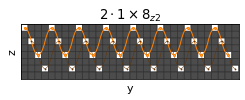

In [4]:
if S==n1:
    print("This skipped-CAIPI trajectory is identical to the shot-selective trajectory, because S=n1.")
    trajectory_color = [0.8,0.8,0]
elif S==1:
    print("This skipped-CAIPI trajectory is identical to the blipped-CAIPI trajectory, because S=1.")
    trajectory_color = [1.0,0,0]
else:
    trajectory_color=[1.0, 0.5, 0]
    
bS = get_zblips(Ry, Rz, Dz, S=S)
print("The z-blip (amplitudes) with S=%d are %d and %d." % (S, bS[0], bS[1]))
nS = get_zblipcycle(Rz, bmin=np.min(get_zblips(Ry, Rz, Dz, S=S)))
print("The z-blip sequence repeats every %d echoes (cycle nS):" % (nS))

plt.figure(figsize = (5*SR,1))
_, notation = plot_skipped_caipi(Ry, Rz, Dz, S, color=trajectory_color, repetitions=SR, bAllShots=True)
plt.title(notation)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

# Plot all unique trajectories associated to specified CAIPI pattern

Reproduce Supporting Information Figure S2 considering both signs for specified CAIPI shift.

## Loop over segmentation factors $S \in [1, n_1]$

where $S=1$ corresponds to blipped-CAIPI trajectory

and $S=n_1$ corresponds to shot-selective trajectory.

## Plot trajectories for $S$ and for larger $S^\prime$ with identical z-blips/cycle

### Eq. A3:

$S^\prime=S+m\cdot n_1$

where $m\in \mathbb{Z}$.

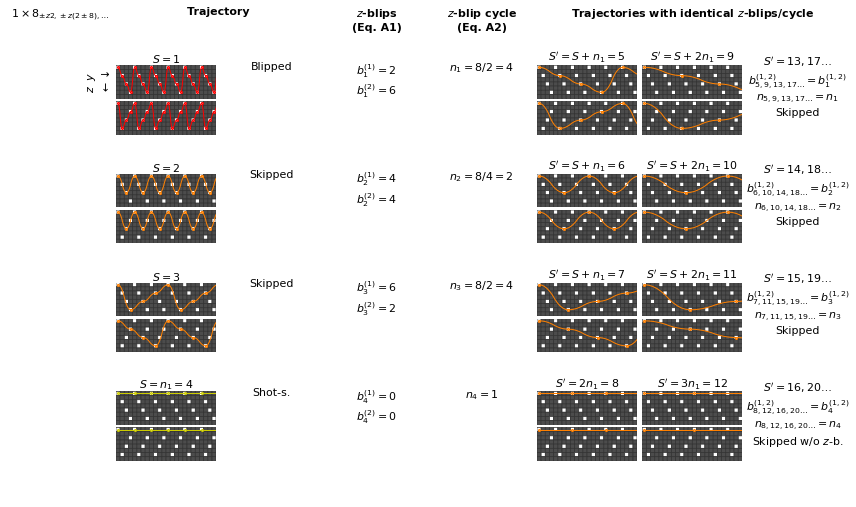

In [5]:
# Both CAIPI shift signs are considered below
Dz = np.abs(Dz)

# Prepare tabular plot      
fig = plt.figure(figsize = (5*SR,(2*n1+1)))
gs = gridspec.GridSpec(nrows=2*n1+1, ncols=8, wspace=0.05, hspace=0.0)
ax = []

# Header
ax += [fig.add_subplot(gs[0:1,0:1])]
ax[-1].text(0,1,'CAIPI pattern',ha='left', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,1:3])]
ax[-1].text(0.5,1,'Trajectory',ha='center', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,3:4])]
ax[-1].text(0.5,1,r'$z$-blips'+'\n(Eq. A1)',ha='center', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,4:5])]
ax[-1].text(0.5,1,r'$z$-blip cycle'+'\n(Eq. A2)',ha='center', va='top', fontweight='bold')
ax += [fig.add_subplot(gs[0:1,5:])]
ax[-1].text(0.5,1,r'Trajectories with identical $z$-blips/cycle',ha='center', va='top', fontweight='bold')

# Sampling notations
ax += [fig.add_subplot(gs[0:n1*2,0:1])]
ax[-1].text(0,1,r'${%d\times %d}_{\pm z%d,\pm z(%d\pm%d),\dots}$' % (Ry, Rz, Dz, Dz,Rz), ha='left', va='top', fontsize=FS, fontweight='bold')

def adjust_plots(ax):
    ax[0].set_xlim([0,SR*Ry*Rz])
    ax[1].set_xlim([0,SR*Ry*Rz])
    pos = ax[0].get_position()
    ax[0].set_position([pos.x0, pos.y0+pos.height/5, pos.width, pos.height])
    ax[1].set_position([pos.x0, pos.y0-(pos.height*4/5)*1.1, pos.width, pos.height])

# LOOP OVER SEGMENTATION FACTORS
currow = 1
for S in range(1,n1+1):
    #Eq. (A1) and (A2)
    bS = get_zblips(Ry, Rz, Dz, S)
    bmin = np.min(bS)
    ns = get_zblipcycle(Rz, bmin)

    title = r'$S=%d$'%(S)
    if S==1:
        trajectory_color=[1,0,0]
        trajectory_type = 'Blipped'
        fontcolor='r'
    elif S==n1:
        trajectory_color=[0.8,0.8,0]
        trajectory_type = 'Shot-s.'
        title = r'$S=n_1=%d$'%(S)
    else:
        trajectory_color=[1.0, 0.5, 0]
        trajectory_type = 'Skipped'
        
    if bmin==0:
        nslabel = r'$n_{%s}=%d$'% (S,ns)
    elif np.mod(Rz,bmin)==0:
        nslabel = r'$n_{%s}=%d/%d=%d$'% (S,Rz,bmin,ns)
    else:
        nslabel = r'$n_{%s}=%d$'% (S,Rz)
        
    fontcolor='k'
    
    # Plot trajectories for segmentation factor, S, with positive and negative CAIPI shift (identical z-blip magnitudes):
    ax += [fig.add_subplot(gs[currow:currow+1,1:2])]
    ax += [fig.add_subplot(gs[currow+1:currow+2,1:2])]
    plot_skipped_caipi(Ry, Rz, Dz, S, ax=ax[-2], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    plot_skipped_caipi(Ry, Rz, -Dz, S, ax=ax[-1], color=trajectory_color, repetitions=SR*2, bAllShots=False)
    adjust_plots(ax[-2:])  
    ax[-2].set_title(title, fontsize=FS, pad=0, color=fontcolor)
    if S==1:
        ax[-2].set_ylabel(r'$z\ \ y$' + '\n' + r'$\leftarrow \downarrow$')

    # Print trajectory type
    ax += [fig.add_subplot(gs[currow:currow+2,2:3])]
    ax[-1].text(0.5,1,trajectory_type, ha='center', va='top', color=fontcolor)

    # Print z-blips and z-blip cycle
    ax += [fig.add_subplot(gs[currow:currow+2,3:4])]
    text = r'$b_{%d}^{(1)}={%d}$' % (S,bS[0]) + '\n' + r'$b_{%d}^{(2)}={%d}$' % (S,bS[1])
    ax[-1].text(0.5,1,text, ha='center', va='top', fontsize=FS, color=fontcolor)
    ax += [fig.add_subplot(gs[currow:currow+2,4:5])]
    ax[-1].text(0.5,1, nslabel, color=fontcolor, ha='center', va='top', fontsize=FS)

    # Plot trajectories for segmentation factor, S' = S + n1, leading to identical z-blips:
    ax += [fig.add_subplot(gs[currow:currow+1,5:6])]
    ax += [fig.add_subplot(gs[currow+1:currow+2,5:6])]
    plot_skipped_caipi(Ry, Rz, Dz, S+n1, ax=ax[-2], color=[1.0, 0.5, 0], repetitions=SR*2, bAllShots=False)
    plot_skipped_caipi(Ry, Rz, -Dz, S+n1, ax=ax[-1], color=[1.0, 0.5, 0], repetitions=SR*2, bAllShots=False)
    adjust_plots(ax[-2:])  
    
    # Plot trajectories for segmentation factor, S' = S + 2*n1, leading to identical z-blips
    ax += [fig.add_subplot(gs[currow:currow+1,6:7])]
    ax += [fig.add_subplot(gs[currow+1:currow+2,6:7])]
    plot_skipped_caipi(Ry, Rz, Dz, S+2*n1, ax=ax[-2], color=[1.0, 0.5, 0], repetitions=SR*2, bAllShots=False)
    plot_skipped_caipi(Ry, Rz, -Dz, S+2*n1, ax=ax[-1], color=[1.0, 0.5, 0], repetitions=SR*2, bAllShots=False)
    adjust_plots(ax[-2:])

    # Print corresponding z-blips, z-blip cycles and Skipped-CAIPI type (with or without z-blips)
    if S==n1:
        ax[-4].set_title(r'$S^\prime=2n_1=%d$'%(S+n1), fontsize=FS, pad=0)
        ax[-2].set_title(r'$S^\prime=3n_1=%d$'%(S+2*n1), fontsize=FS, pad=0)
        scheme_type = r'Skipped w/o $z$-b.'
    else:
        ax[-4].set_title(r'$S^\prime=S+n_1=%d$'%(S+n1), fontsize=FS, pad=0)
        ax[-2].set_title(r'$S^\prime=S+2n_1=%d$'%(S+2*n1), fontsize=FS, pad=0)
        scheme_type = 'Skipped'
    ax += [fig.add_subplot(gs[currow:currow+2,7:])]
    ax[-1].text(0.5,1.0, r'$S^\prime=%d,%d\dots$'%(S+3*n1,S+4*n1), ha='center', va='center', fontsize=FS)
    ax[-1].text(0.5,0.9,  r'$b_{%d,%d,%d,%d\dots}^{(1,2)}=b_{%d}^{(1,2)}$'%(S+n1,S+2*n1,S+3*n1,S+4*n1,S) + '\n'
                        + r'$n_{%d,%d,%d,%d\dots}=n_{%d}$'%(S+n1,S+2*n1,S+3*n1,S+4*n1,S) + '\n'
                        + scheme_type, ha='center', va='top', fontsize=FS)

    # Go to next row of the table for the next S -> S+1
    currow+=2

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    for spine in a.spines.values():
        spine.set_color('none')
        
plt.show()
